<a href="https://colab.research.google.com/github/lambdaps/TensorFlow-Notebook/blob/master/Basic%20Classification%20-%20Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


In [0]:
#Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Class names used along train labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



(60000, 28, 28)
(60000,)
9


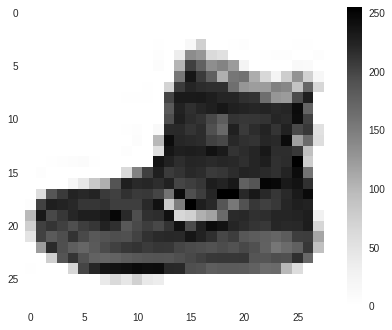

In [7]:
#Explore Data
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0])

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
#Preprocess the data